In [2]:
import glob
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn import linear_model
import datetime
import dateutil.parser as parser
%matplotlib inline
plt.style.use('ggplot')

### Zika data

In [417]:
# master dataframe
cdcUSA = pd.read_csv("cdcUSA.csv", usecols = ['report_date','location','data_field','value'])
# reindex to get rid of 'United_States-' prefix
cdcUSA.location = [x[len('United_States-'):] for x in cdcUSA.location]
# replace "_" with " " in location
cdcUSA.location = cdcUSA.location.apply(lambda x: x.replace("_"," "))

In [418]:
cdcUSA.head(4)

,report_date,location,data_field,value
0,2016-02-24,Alabama,zika_reported_travel,1
1,2016-02-24,Alabama,zika_reported_local,0
2,2016-02-24,American Samoa,zika_reported_local,4
3,2016-02-24,American Samoa,zika_reported_travel,0


#### without multiindex

In [56]:
# make dataframe of total cases separated by local and travel
zika_counts = cdcUSA.groupby(['location','data_field']).sum().value.unstack('data_field')
# add missing states
zika_counts.loc['Alaska'] = 0
zika_counts.loc['Idaho'] = 0
zika_counts.loc['North Dakota'] = 0
zika_counts.loc['South Dakota'] = 0
zika_counts.loc['Wyoming'] = 0
# sort alphabetical order
zika_counts.sort(inplace=True)

/Users/amandazhang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(....) is deprecated, use sort_index(.....)


In [66]:
zika_counts.head(2)

data_field,zika_reported_local,zika_reported_travel
location,,
Alabama,0,165
Alaska,0,0


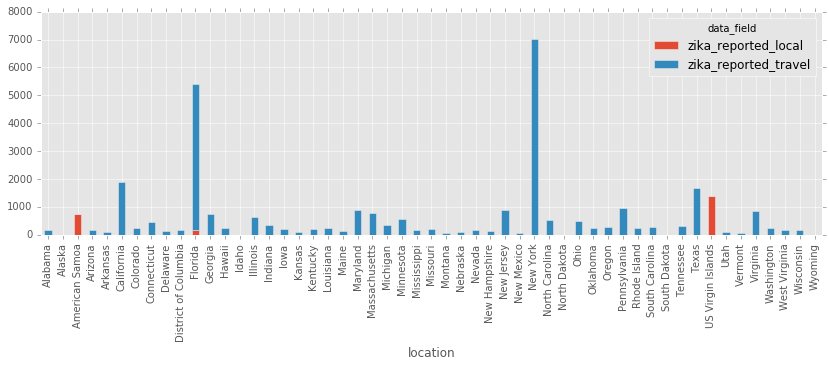

In [62]:
# remove PR and plot
zika_counts_noPR = zika_counts.drop('Puerto Rico')
zika_counts_noPR.plot(kind='bar',stacked=True, figsize=(14,4))

#### with multiindex

In [419]:
# make multiindex
cdcUSA.set_index(['location','report_date'], inplace=True)

#### separate local and travel dataframes

In [420]:
# make local and travel dataframes
cdcUSA_local = cdcUSA[cdcUSA.data_field == 'zika_reported_local']
cdcUSA_travel = cdcUSA[cdcUSA.data_field == 'zika_reported_travel']
cdcUSA_local.drop('data_field',axis=1,inplace=True)
cdcUSA_travel.drop('data_field',axis=1,inplace=True)

/Users/amandazhang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/amandazhang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### add missing states

In [421]:
# list of missing states
missing_states = ['Alaska','Idaho','North Dakota','South Dakota','Wyoming']
# list of unique dates
dates = set([x[1] for x in cdcUSA_local.index])
# add 0 for missing states
for state in missing_states:
    for date in dates:
        cdcUSA_local.ix[(state,date),:] = 0
        cdcUSA_travel.ix[(state,date),:] = 0
# sort alphabetical order
cdcUSA_local.sort(inplace=True)
cdcUSA_travel.sort(inplace=True)

/Users/amandazhang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/amandazhang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/amandazhang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(....) is deprecated, use sort_index(.....)
/Users/amandazhang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(....) is deprecated, use sort_index(.....)


Mississippi
Oklahoma
Delaware
Minnesota
Illinois
Arkansas
New Mexico
Indiana
Maryland
Louisiana
Idaho
US Virgin Islands
Tennessee
Arizona
Iowa
Michigan
Kansas
Utah
American Samoa
Oregon
Connecticut
Montana
California
Massachusetts
Puerto Rico
South Carolina
New Hampshire
Wisconsin
Vermont
Georgia
North Dakota
Pennsylvania
West Virginia
Florida
Hawaii
Kentucky
Alaska
Nebraska
Missouri
Ohio
Alabama
New York
South Dakota
Colorado
New Jersey
Virginia
Washington
North Carolina
District of Columbia
Wyoming
Texas
Nevada
Maine
Rhode Island


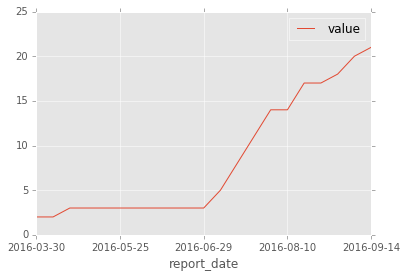

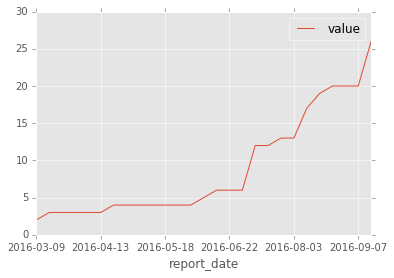

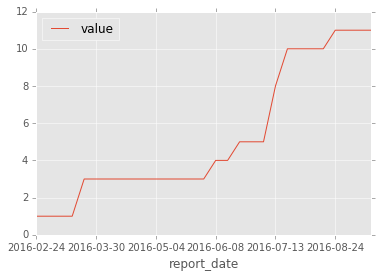

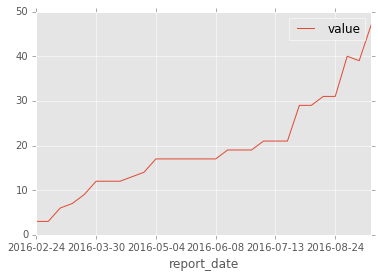

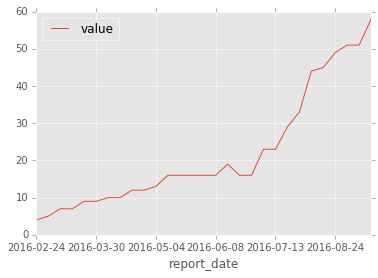

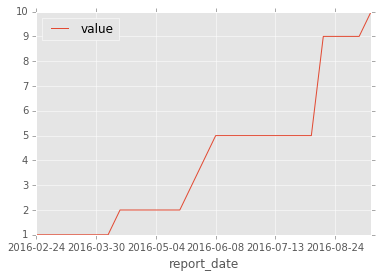

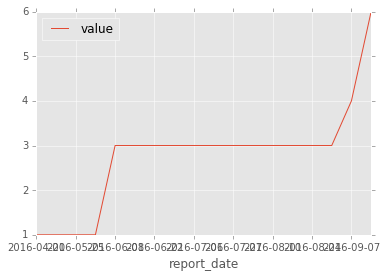

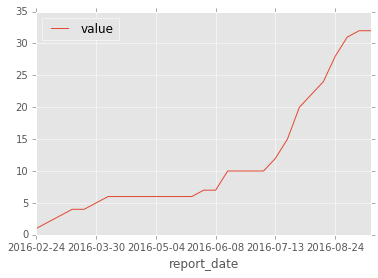

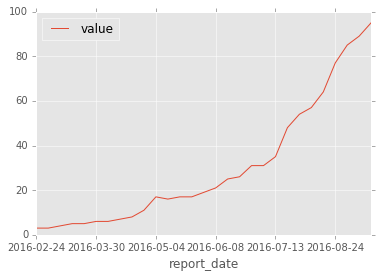

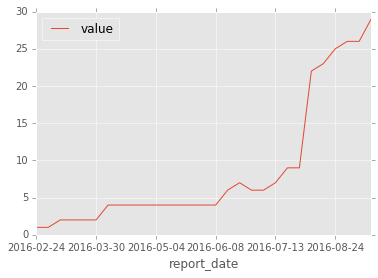

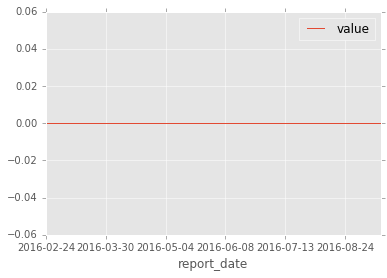

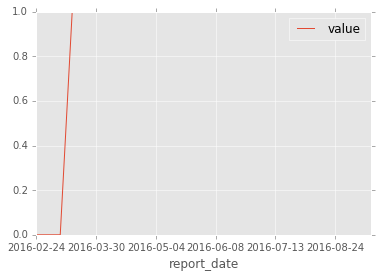

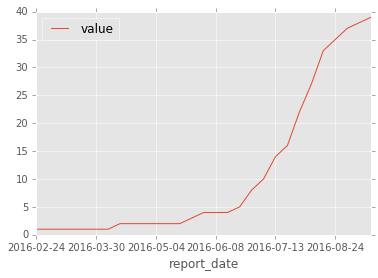

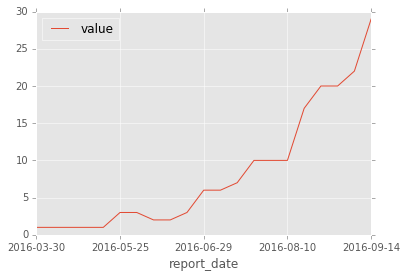

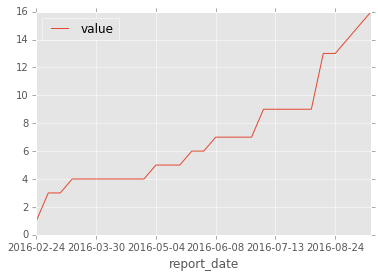

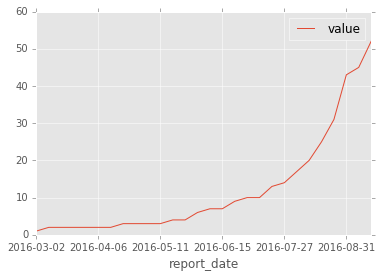

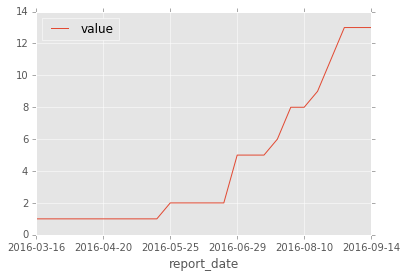

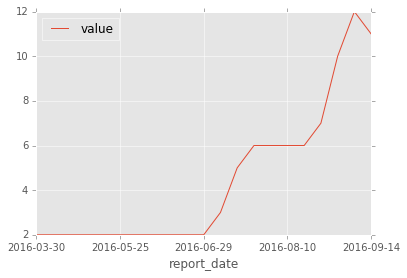

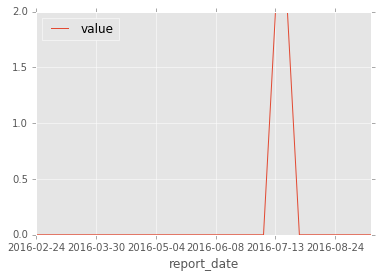

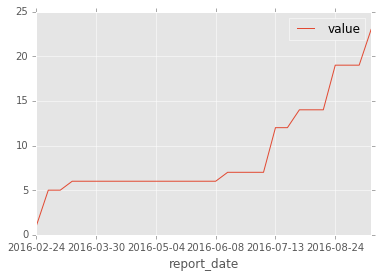

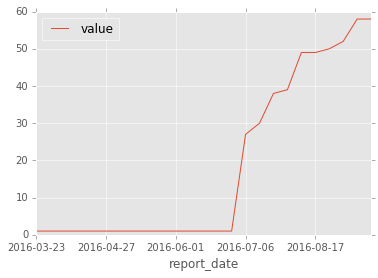

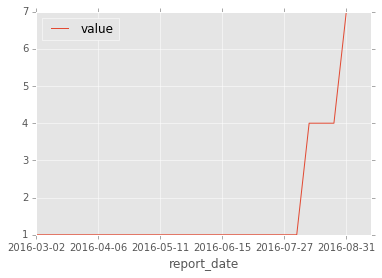

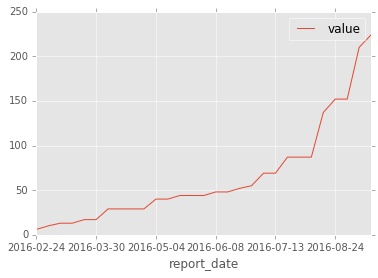

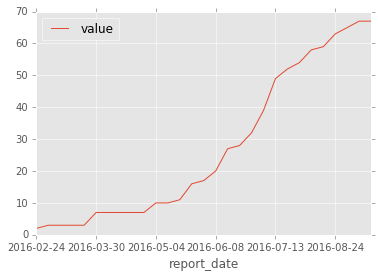

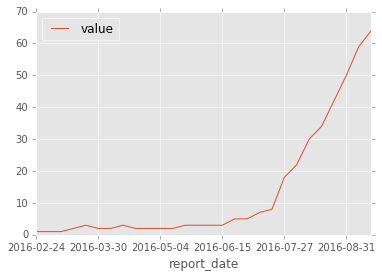

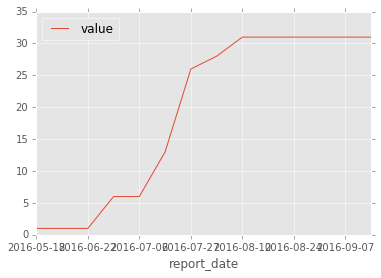

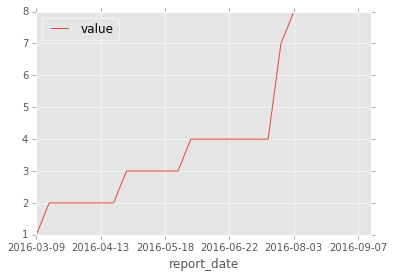

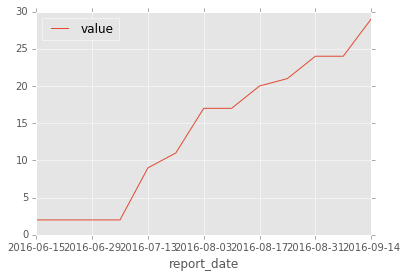

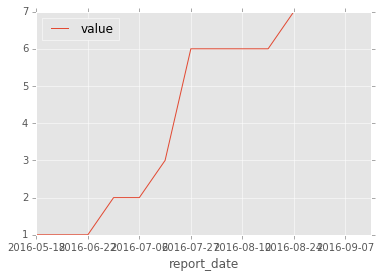

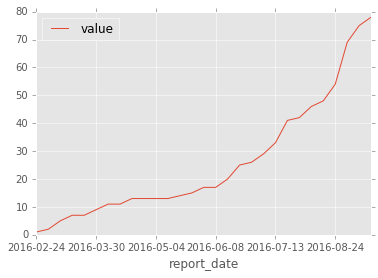

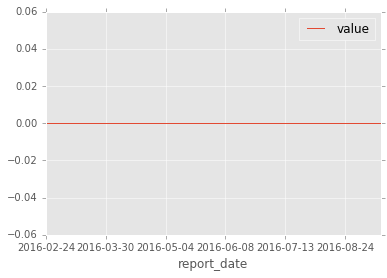

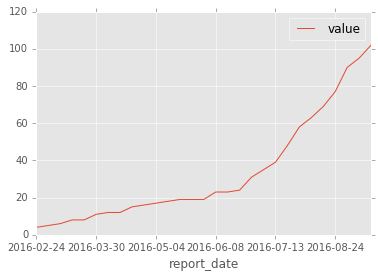

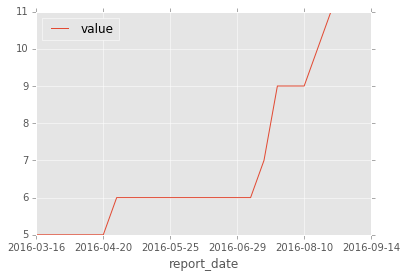

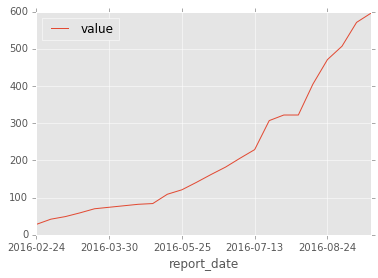

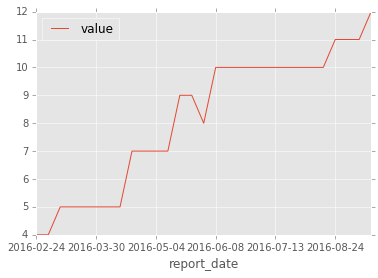

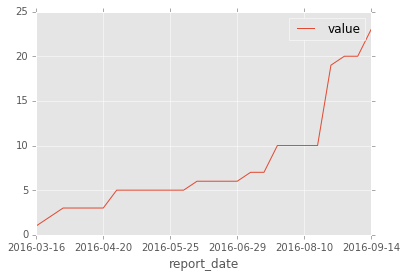

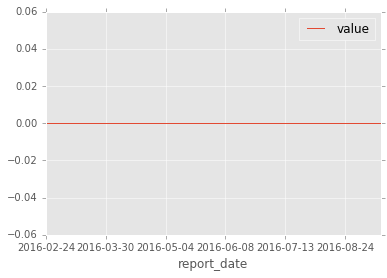

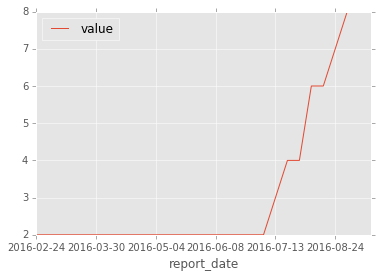

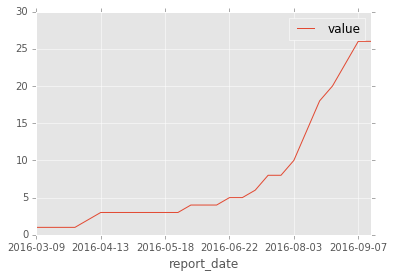

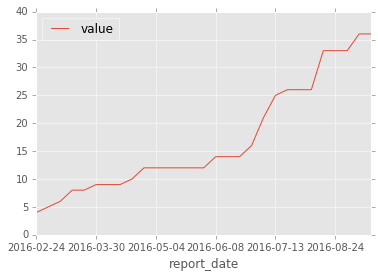

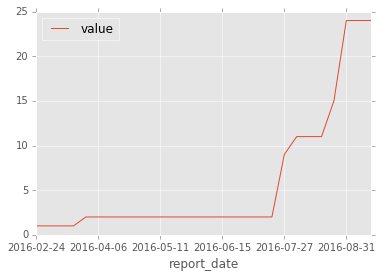

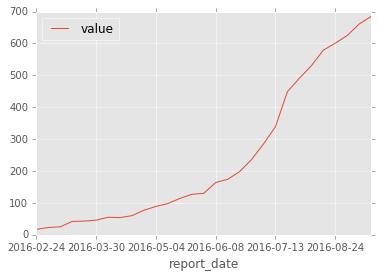

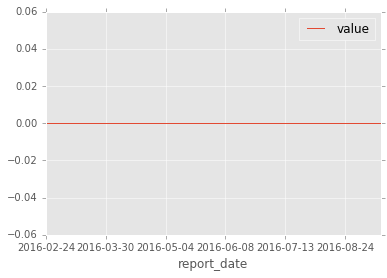

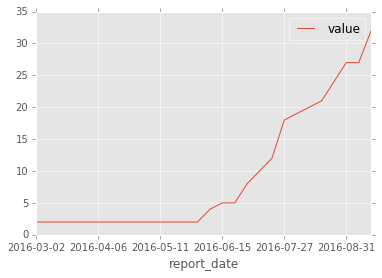

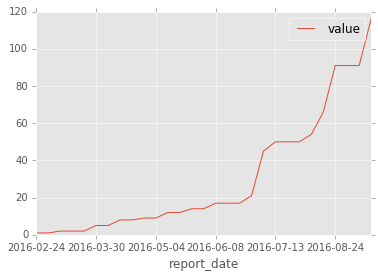

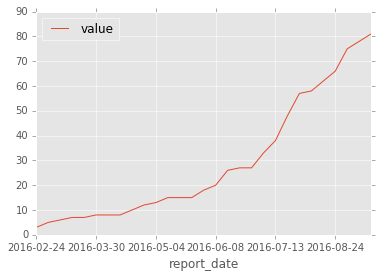

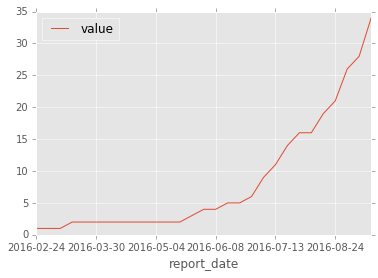

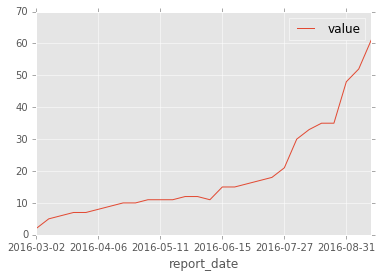

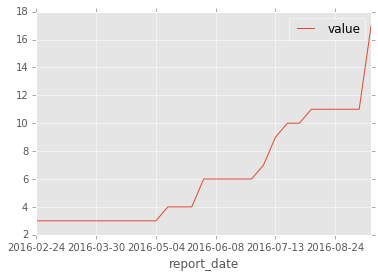

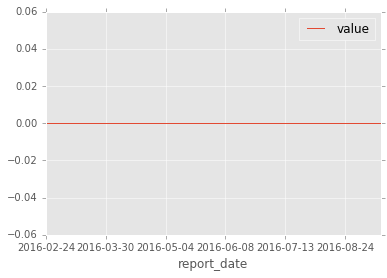

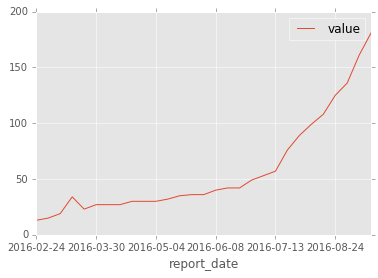

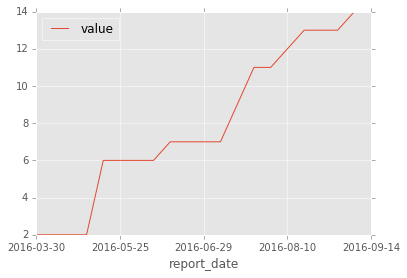

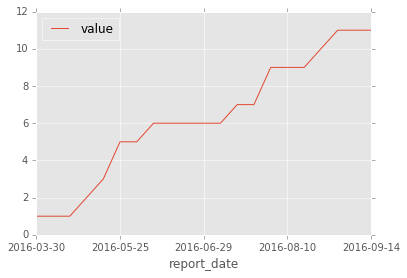

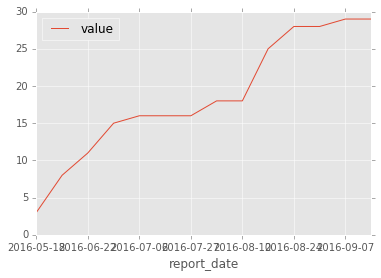

In [424]:
# explore whether zika data is cumulative or not
states = set([x[0] for x in cdcUSA_travel.index])
states = list(states)
for i in range(len(states)):
    print states[i]
    cdcUSA_travel.xs(states[i],level='location').plot()

In [426]:
cdcUSA_travel

value
location  report_date       
Alabama   2016-02-24     1.0
          2016-03-02     1.0
          2016-03-09     1.0
          2016-03-16     1.0
          2016-03-23     2.0
          2016-04-06     2.0
          2016-04-13     2.0
          2016-04-20     2.0
          2016-04-27     2.0
          2016-05-04     2.0
          2016-05-11     2.0
          2016-05-18     2.0
          2016-05-25     2.0
          2016-06-01     2.0
          2016-06-08     2.0
          2016-06-15     2.0
          2016-06-22     2.0
          2016-06-29     2.0
          2016-07-06     2.0
          2016-07-13     2.0
          2016-07-27     9.0
          2016-08-03    11.0
          2016-08-10    11.0
          2016-08-17    11.0
          2016-08-24    15.0
          2016-08-31    24.0
          2016-09-07    24.0
          2016-09-14    24.0
Alaska    2016-02-24     0.0
          2016-03-02     0.0
...                      ...
Wisconsin 2016-09-14    29.0
Wyoming   2016-02-24     0.0
          2016-03-02     0.0
          2016-03-09     0.0
          2016-03-16     0.0
          2016-03-23     0.0
          2016-03-30     0.0
          2016-04-06     0.0
          2016-04-13     0.0
          2016-04-20     0.0
          2016-04-27     0.0
          2016-05-04     0.0
          2016-05-11     0.0
          2016-05-18     0.0
          2016-05-25     0.0
          2016-06-01     0.0
          2016-06-08     0.0
          2016-06-15     0.0
          2016-06-22     0.0
          2016-06-29     0.0
          2016-07-06     0.0
          2016-07-13     0.0
          2016-07-27     0.0
          2016-08-03     0.0
          2016-08-10     0.0
          2016-08-17     0.0
          2016-08-24     0.0
          2016-08-31     0.0
          2016-09-07     0.0
          2016-09-14     0.0

[1424 rows x 1 columns]

In [429]:
temp_by_month = pd.read_csv('US2013temps.csv',usecols=['AverageTemperature','State','Month'])

In [430]:
temp_by_month.head(2)

,AverageTemperature,State,Month
0,10.284,Alabama,1
1,9.161,Alabama,2


In [ ]:
if str(report_date)[6] == month_ix:
    df['temp'] = 

### OAG data

In [190]:
### OAG flight stuff
oag = pd.read_csv('OAGJAN13.csv')

# take out relevant columns
oag_subset = oag[['depctry','arrctry','arrcity','days','efffrom','effto','seats','distance']]

# turn days into number of days
oag_subset.days = [len(x) for x in oag_subset.days]

# translate fromday (str) to number of days from beginning of 2016 (int)
# same for today
fromdays = np.array(map(lambda x: int(x[-2:]) + 30*(int(x[-4:-2])-1), oag_subset.efffrom.astype(str)))
todays = np.array(map(lambda x: int(x[-2:]) + 30*(int(x[-4:-2])-1),oag_subset.effto.astype(str)))

# only interested in up to Sept 14 (since only have Zika data for then)
todays[todays > 257] = [257]*len(todays[todays > 257]) # cannot end after Sept 14
oag_subset['fromdays'] = fromdays
oag_subset['todays'] = todays
oag_subset['flights'] = ((todays - fromdays)/7.0 * oag_subset['days'].astype(int)) # calculate flights
oag_subset = oag_subset.ix[oag_subset.fromdays < 257] # cannot start after Sept 14
# round to integer
oag_subset.flights = np.round(oag_subset.flights)

# remove unneeded columns 'effrom' 'effto' etc
oag_subset = oag_subset[['depctry','arrctry','arrcity','seats','distance','flights']]

# only interested in BR to US
oag_subset = oag_subset[(oag_subset.depctry == 'BR') & (oag_subset.arrctry == 'US')]

/Users/amandazhang/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (51,53,54,55,56,58,60,62,64,66,68,70,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/amandazhang/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/amandazhang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h

In [192]:
# calculate total_seats and flights for each route
oag_subset['total_seats_oag'] = oag_subset.seats * oag_subset.flights
total_seats_oag = oag_subset['total_seats_oag'].groupby(oag_subset.arrcity).sum()
flights_oag = oag_subset['flights'].groupby(oag_subset.arrcity).sum()

In [195]:
# consolidate
oag_data = pd.DataFrame([total_seats_oag,flights_oag]).T
# group by state instead of arrcity
state = ['Georgia','Massachusetts','Illinois','North Carolina','Texas','Michigan','Texas',
         'California','Florida','New York','Florida','California','Washington']
oag_data.index = state
oag_data = oag_data.groupby(oag_data.index).sum()
oag_data.columns = ['total_seats_oag','flights_oag']

In [196]:
oag_data

,total_seats_oag,flights_oag
California,220248.0,917.0
Florida,1961505.0,10561.0
Georgia,291126.0,1250.0
Illinois,203364.0,756.0
Massachusetts,3444.0,14.0
Michigan,52290.0,249.0
New York,1426618.0,5422.0
North Carolina,84816.0,384.0
Texas,256096.0,1076.0
Washington,493615.0,1835.0


### BTS data

In [8]:
### BTS data
bts_data = pd.read_csv('stateflightdata_jan_june.csv', index_col = 'State')
bts_data.drop('abr', axis=1, inplace=True)

### Connectivity data

In [292]:
connect = pd.DataFrame([['Florida', 434.69616252523247], ['New York', 440.04009010061714], ['California', 444.85409595129727], ['Texas', 455.8554103313701], ['Illinois', 468.8176337993529], ['Georgia', 473.31074347467], ['Washington D.C.', 538.5363106259356], ['North Carolina', 541.3294184313457], ['Colorado', 572.0684725046116], ['Nevada', 574.6588617975838], ['Washington', 576.1148633780251], ['Arizona', 577.2711790627785], ['Michigan', 582.580235623788], ['Massachusetts', 587.1065703311507], ['Minnesota', 602.7468429554243], ['Missouri', 695.2574644835706], ['Ohio', 722.3612803945238], ['Maryland', 754.2498835598093], ['Tennessee', 762.7879232826781], ['Utah', 774.4329545629312], ['Oregon', 776.6670499428964], ['Hawaii', 781.5533687270126], ['Louisiana', 837.873690862505], ['Pennsylvania', 945.0532504798132], ['Kentucky', 1035.8216718619483], ['Indiana', 1055.267974385317], ['Wisconsin', 1068.96931656824], ['Virginia', 1152.7144988011262], ['Oklahoma', 1229.1530422850385], ['South Carolina', 1247.0510451239763], ['Connecticut', 1586.9933949590088], ['Alabama', 1594.4785722262145], ['New Mexico', 1613.1637313056535], ['Nebraska', 1730.2899060273187], ['Alaska', 1863.301594404632], ['Arkansas', 2039.8009853435462], ['Iowa', 2045.2632717411666], ['Idaho', 2383.462328130591], ['Rhode Island', 2615.9380937612636], ['Montana', 2954.2612119150044], ['Maine', 3246.098649851817], ['Kansas', 3421.613158628434], ['Mississippi', 3515.868733425839], ['North Dakota', 3814.9784475603174], ['New Hampshire', 4010.967055968573], ['South Dakota', 5456.386019572374], ['Vermont', 5787.906798157988], ['Wyoming', 7881.000598155415], ['New Jersey', 9099.081839271023], ['West Virginia', 9436.999356367092], ['Delaware', 24879.120527832612]])
connect.columns = [['State','commute_time']]
connect.set_index('State', inplace=True)
connect.sort(inplace=True)

/Users/amandazhang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(....) is deprecated, use sort_index(.....)


In [293]:
connect.head()

,commute_time
State,
Alabama,1594.478572
Alaska,1863.301594
Arizona,577.271179
Arkansas,2039.800985
California,444.854096


### Other data (pop, temp, mosquito)

In [217]:
### Population data
pop_data = pd.read_csv('state_populations.csv', index_col = 'State')
pop_data['pop'] = map(lambda x: int(x.replace(',','')), pop_data['pop']) # string to int
pop_data.sort(inplace=True)

/Users/amandazhang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(....) is deprecated, use sort_index(.....)


In [218]:
### temperature data
temp = pd.read_csv('usa_avg_summer_temp.csv', index_col='State')

In [219]:
### mosquito data from Russell
mosquito = pd.read_csv('mosquitodata.csv', index_col=0)
mosquito.sort(inplace=True)

/Users/amandazhang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  app.launch_new_instance()


### Put everything together for master df

In [294]:
# make master dataframe
master = pd.DataFrame({})
master['zika_counts'] = zika_counts.zika_reported_travel
master['temp'] = temp
master['pop'] = pop_data
master['mosquito'] = mosquito['Number of occurences (1960-2016)']
master['total_seats_oag'] = oag_data.total_seats_oag
master['flights_oag'] = oag_data.flights_oag
master['commute_time'] = connect.commute_time
#master['passengers_bts'] = bts_data.passengers

In [295]:
master.fillna(0, inplace=True)
master = master.sort()

/Users/amandazhang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  from ipykernel import kernelapp as app


In [407]:
master.head(10)

,zika_counts,temp,pop,mosquito,total_seats_oag,flights_oag,commute_time
location,,,,,,,
Alabama,165,78.6,4863300,55.0,0.0,0.0,1594.478572
Alaska,0,52.3,741894,0.0,0.0,0.0,1863.301594
American Samoa,4,86.0,54343,12.0,0.0,0.0,0.000000
Arizona,175,78.1,6931071,48.0,0.0,0.0,577.271179
Arkansas,117,78.8,2988248,25.0,0.0,0.0,2039.800985
California,1881,73.4,39250017,53.0,220248.0,917.0,444.854096
Colorado,260,65.2,5540545,1.0,0.0,0.0,572.068473
Connecticut,465,69.2,3576452,0.0,0.0,0.0,1586.993395
Delaware,152,74.2,952065,6.0,0.0,0.0,24879.120528


### Regressions

In [328]:
# regression time!
# make x and y
y = master.zika_counts

x = master.drop('zika_counts', axis=1)
x_flightsonly = x[['temp','pop','mosquito','flights_oag']]

# scale
x = preprocessing.scale(x)
x_flightsonly = preprocessing.scale(x_flightsonly)

In [342]:
model = linear_model.LassoCV(cv=50)
model.fit(x,y)
print 'Base model\n'
print 'coef_temp: ', round(model.coef_[0],2)
print 'coef_pop: ', round(model.coef_[1],2)
print 'coef_mosquito: ', round(model.coef_[2],2)
print 'coef_seats: ', round(model.coef_[3],2)
print 'coef_flights: ', round(model.coef_[4],2)
print 'intercept: ', round(model.intercept_,2)

print '\nR2: ', round(model.score(x,y),4)

Base model

coef_temp:  -0.0
coef_pop:  198.53
coef_mosquito:  -0.0
coef_seats:  848.1
coef_flights:  0.0
intercept:  552.96

R2:  0.8455


In [341]:
# model flights only
model_flightsonly = linear_model.LassoCV(cv=50)
model_flightsonly.fit(x_flightsonly,y)
print 'Flights only model\n'
print 'coef_temp: ', round(model_flightsonly.coef_[0],2)
print 'coef_pop: ', round(model_flightsonly.coef_[1],2)
print 'coef_mosquito: ', round(model_flightsonly.coef_[2],2)
print 'coef_flights: ', round(model_flightsonly.coef_[3],2)
print 'intercept: ', round(model_flightsonly.intercept_,2)

print '\nR2: ', round(model_flightsonly.score(x_flightsonly,y),4)

Flights only model

coef_temp:  -0.0
coef_pop:  199.43
coef_mosquito:  -0.0
coef_flights:  699.63
intercept:  552.96

R2:  0.7518


#### regressions with connectivity

In [298]:
# dataframe with commute times
master_new = master.drop(['American Samoa','District of Columbia','US Virgin Islands','Puerto Rico'])

In [307]:
# regression time!
# make x and y
y = master_new.zika_counts

x = master_new.drop('zika_counts', axis=1)
x_flightsonly = x[['temp','pop','mosquito','commute_time']]

# scale
x = preprocessing.scale(x)
x_flightsonly = preprocessing.scale(x_flightsonly)

In [324]:
model = linear_model.LassoCV(cv=50)
model.fit(x,y)
print 'Base model\n'
print 'coef_temp: ', round(model.coef_[0],2)
print 'coef_pop: ', round(model.coef_[1],2)
print 'coef_mosquito: ', round(model.coef_[2],2)
print 'coef_seats: ', round(model.coef_[3],2)
print 'coef_flights: ', round(model.coef_[4],2)
print 'coef_commute_time: ', round(model.coef_[5],2)
print 'intercept: ', round(model.intercept_,2)

print '\nR2: ', round(model.score(x,y),4)

Base model

coef_temp:  -0.0
coef_pop:  201.31
coef_mosquito:  -0.0
coef_seats:  879.19
coef_flights:  0.0
coef_commute_time:  -0.0
intercept:  585.36

R2:  0.8446


In [327]:
# model commute time only
model_flightsonly = linear_model.LassoCV(cv=50)
model_flightsonly.fit(x_flightsonly,y)
print 'Commute_time only model\n'
print 'coef_temp: ', round(model_flightsonly.coef_[0],2)
print 'coef_pop: ', round(model_flightsonly.coef_[1],2)
print 'coef_mosquito: ', round(model_flightsonly.coef_[2],2)
print 'coef_commute_time: ', round(model_flightsonly.coef_[3],2)
print 'intercept: ', round(model_flightsonly.intercept_,2)

print '\nR2: ', round(model_flightsonly.score(x_flightsonly,y),4)

 Commute_time only model

coef_temp:  0.0
coef_pop:  509.57
coef_mosquito:  0.0
coef_commute_time:  -0.0
intercept:  585.36

R2:  0.3521


### Correlations

In [234]:
total_seats_oag.corr(flights_oag)

0.97421608446920094

In [192]:
master.total_seats_oag.corr(master.passengers_bts)

0.92587897393074858

In [193]:
master.flights_oag.corr(master.passengers_bts)

0.96886274803221073

In [235]:
master.mosquito.corr(master.temp)

0.59965718303296234

In [313]:
master.commute_time.corr(master.flights_oag)

-0.12420611931797636

### Making plots

In [245]:
# don't use Puerto Rico because too large
master_noPR = master.drop('Puerto Rico')
zika_counts_noPR = zika_counts.drop('Puerto Rico')

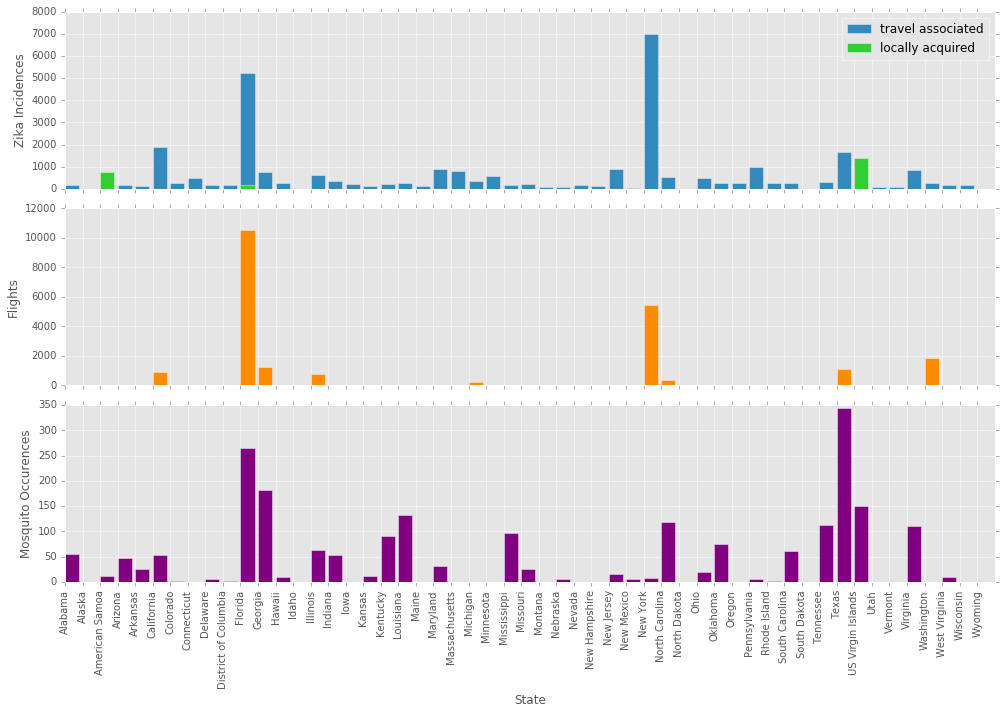

In [273]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(14,10))
ind = np.arange(len(master_noPR))
ax1.bar(ind, zika_counts_noPR.zika_reported_travel, label='travel associated')
ax1.bar(ind, zika_counts_noPR.zika_reported_local, color='limegreen', label='locally acquired')
ax1.legend()
ax2.bar(ind, master_noPR.flights_oag, color='darkorange')
ax3.bar(ind, master_noPR.mosquito, color='purple')
ax2.set_ylabel('Flights')
ax1.set_ylabel('Zika Incidences')
ax3.set_ylabel('Mosquito Occurences')
ax3.set_xlabel('State')
labels = master_noPR.index
plt.xticks(ind,labels,rotation ='vertical')
#fig.suptitle('Zika Incidences, Flights, Mosquito Occurences by State', fontsize=20)
plt.tight_layout()
ax1.set_xlim(0,53)

plt.savefig('subcharts2.png', dpi=100)

In [373]:
def scatterplot(x,y,xname,yname):
    fig, ax = plt.subplots(1,1, figsize=(8,6))
    ax.scatter(x, y)
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1])
    ax.annotate('corr = '+str(round(x.corr(y),3)),
                xy=(0.7,0.8), xycoords='axes fraction', fontsize=14)
    ax.set_xlabel(xname)
    ax.set_ylabel(yname)
    ax.set_title(xname+' v. '+yname)

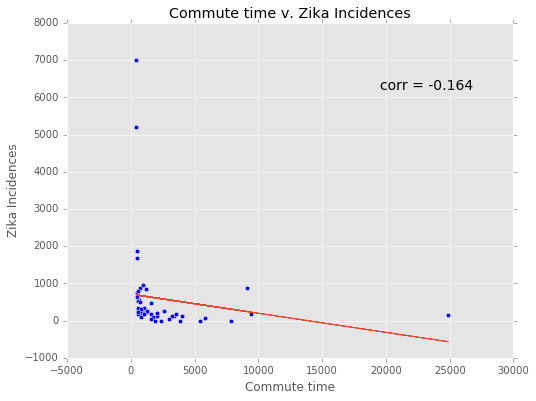

In [374]:
scatterplot(master_new.commute_time, master_new.zika_counts, 'Commute time','Zika Incidences')

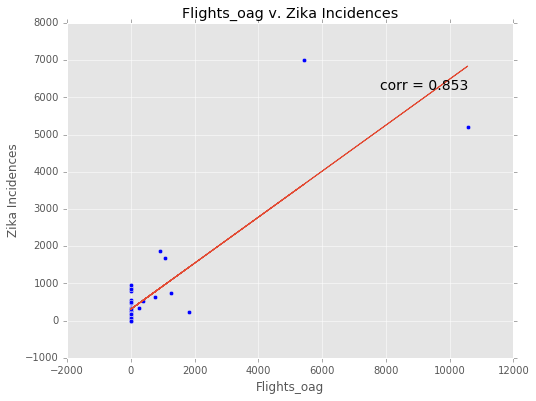

In [375]:
scatterplot(master_new.flights_oag, master_new.zika_counts, 'Flights_oag','Zika Incidences')

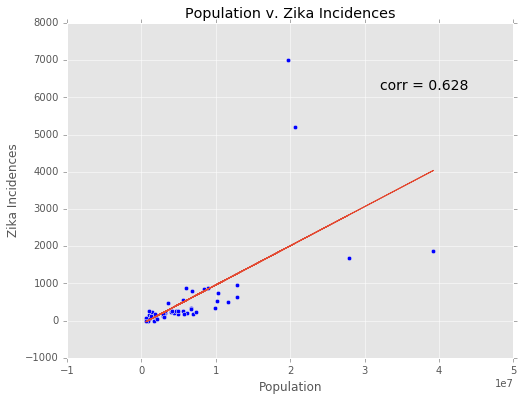

In [376]:
scatterplot(master_new['pop'], master_new.zika_counts, 'Population','Zika Incidences')

#### change in zika_counts

In [413]:
cdcUSA_travel2 = cdcUSA_travel.reset_index(level=['location','report_date'])
cdcUSA_diffs = cdcUSA_travel2.groupby('report_date').sum().diff()

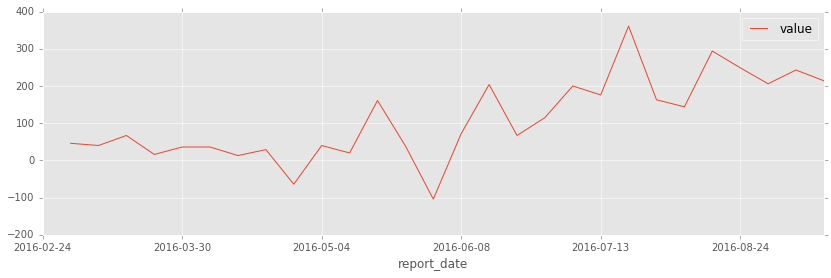

In [415]:
cdcUSA_diffs.plot(figsize=(14,4))